In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
# Lista:produtos escolares
compras = [
    ['caderno', 'lápis', 'borracha', 'caneta'],
    ['caderno', 'lápis', 'régua'],
    ['mochila', 'caderno', 'lápis', 'apontador'],
    ['caderno', 'marca-texto', 'caneta'],
    ['mochila', 'régua', 'lápis', 'borracha'],
    ['compasso', 'transferidor', 'régua'],
    ['borracha', 'caderno', 'caneta', 'marca-texto'],
    ['caderno', 'lápis', 'apontador'],
    ['mochila', 'caneta', 'marca-texto'],
    ['régua', 'compasso', 'caderno'],
    ['estojo', 'lápis', 'borracha'],
    ['cola', 'tesoura', 'papel sulfite'],
    ['pincel', 'tinta guache', 'papel cartão'],
    ['papel sulfite', 'caderno', 'caneta'],
    ['dicionário', 'livro didático', 'mochila'],
    ['caderno', 'marca-texto', 'post-it'],
    ['calculadora', 'caderno', 'caneta'],
    ['clips', 'grampeador', 'papel sulfite'],
    ['papel cartão', 'cola', 'tesoura'],
    ['transferidor', 'compasso', 'calculadora'],
    ['marca-texto', 'caneta', 'post-it'],
    ['estojo', 'lápis', 'apontador', 'borracha'],
    ['mochila', 'estojo', 'caderno'],
    ['lápis de cor', 'canetinha', 'papel cartão'],
    ['pincel', 'lápis de cor', 'tinta guache'],
    ['papel cartão', 'papel sulfite', 'cartolina'],
    ['dicionário', 'marca-texto', 'livro didático'],
    ['mochila', 'livro didático', 'caderno'],
]

In [3]:
# One-hot encoding
te = TransactionEncoder()
df_encoded = te.fit_transform(compras)
df = pd.DataFrame(df_encoded, columns=te.columns_)

In [4]:
# Aplicar Apriori
itens_frequentes = apriori(df, min_support=0.15, use_colnames=True)

In [5]:
# Regras de associação
regras = association_rules(itens_frequentes, metric="lift", min_threshold=1)

In [6]:
# Exibir resultados
print("📦 Itens frequentes:")
print(itens_frequentes)

📦 Itens frequentes:
    support           itemsets
0  0.178571         (borracha)
1  0.428571          (caderno)
2  0.250000           (caneta)
3  0.250000            (lápis)
4  0.214286      (marca-texto)
5  0.214286          (mochila)
6  0.178571  (caderno, caneta)


In [7]:
print("\n🔗 Regras de associação:")
print(regras[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


🔗 Regras de associação:
  antecedents consequents   support  confidence      lift
0   (caderno)    (caneta)  0.178571    0.416667  1.666667
1    (caneta)   (caderno)  0.178571    0.714286  1.666667


In [8]:
regras_filtradas = regras[(regras['confidence'] > 0.6) & (regras['lift'] > 1.2)]
print(regras_filtradas[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

  antecedents consequents   support  confidence      lift
1    (caneta)   (caderno)  0.178571    0.714286  1.666667


In [9]:
regras_ordenadas = regras_filtradas.sort_values(by='lift', ascending=False)
print(regras_ordenadas.head(10))

  antecedents consequents  antecedent support  consequent support   support  \
1    (caneta)   (caderno)                0.25            0.428571  0.178571   

   confidence      lift  representativity  leverage  conviction  \
1    0.714286  1.666667               1.0  0.071429         2.0   

   zhangs_metric   jaccard  certainty  kulczynski  
1       0.533333  0.357143        0.5    0.565476  


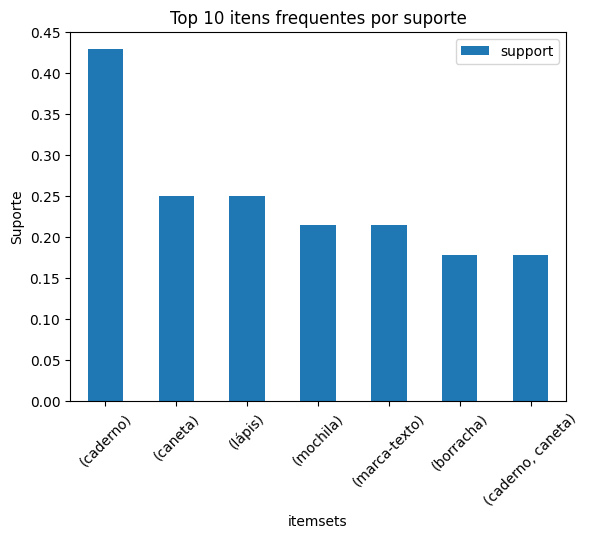

In [10]:
itens_frequentes.sort_values(by='support', ascending=False).head(10).plot.bar(x='itemsets', y='support')
plt.title('Top 10 itens frequentes por suporte')
plt.ylabel('Suporte')
plt.xticks(rotation=45)
plt.show()

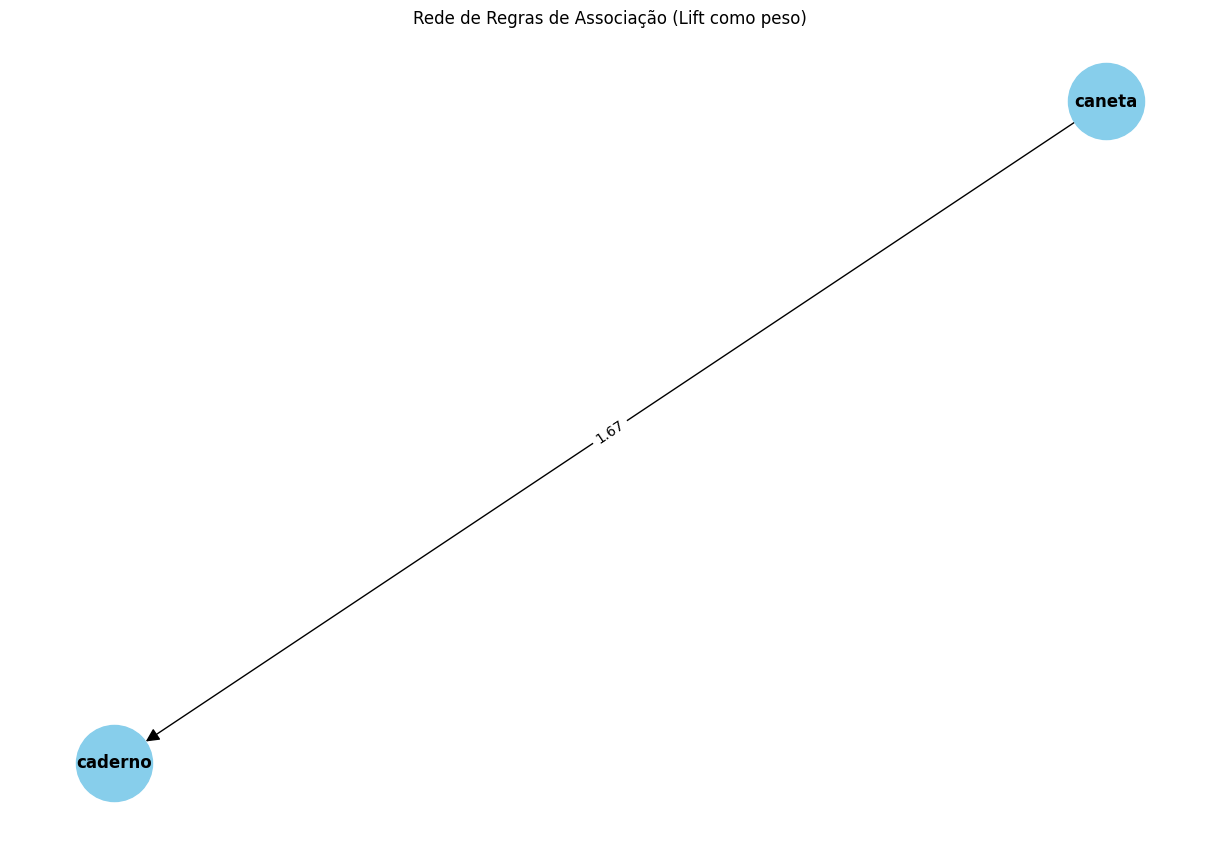

In [11]:
G = nx.DiGraph()

for _, row in regras_filtradas.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

pos = nx.spring_layout(G, k=1)
plt.figure(figsize=(12,8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold', arrowsize=20)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k,v in labels.items()})
plt.title('Rede de Regras de Associação (Lift como peso)')
plt.show()

In [12]:
for _, row in regras_ordenadas.head(5).iterrows():
    print(f"Se {set(row['antecedents'])} então {set(row['consequents'])} com confiança {row['confidence']:.2f} e lift {row['lift']:.2f}")

Se {'caneta'} então {'caderno'} com confiança 0.71 e lift 1.67
